In [1]:
## importation
import scipy
# print('scipy: {}'.format(scipy.__version__))
import numpy 
# print('numpy: {}'.format(numpy.__version__))
import matplotlib 
# print('matplotlib: {}'.format(matplotlib.__version__)) 
import pandas 
# print('pandas: {}'.format(pandas.__version__))
import sklearn 
# print('sklearn: {}'.format(sklearn.__version__))
from pandas import read_csv
import numpy as np 
from matplotlib import pyplot
import numpy
from pandas.plotting import scatter_matrix
from numpy import set_printoptions 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer 
from sklearn.preprocessing import Binarizer 

In [2]:
# insertion du fichier csv train dans un dataframe

df_train_full = read_csv( './csv/train.csv' )
df_test = read_csv('./csv/test.csv')

In [4]:
# peek
peek = df_train_full.head(10)
print(peek)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [5]:
# description
description = df_train_full.describe() 
print(description)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [7]:
# effectif des classes
class_counts = df_train_full.groupby('LotShape').size() 
print(class_counts)

LotShape
IR1    484
IR2     41
IR3     10
Reg    925
dtype: int64


In [8]:
# corrélation
correlations = df_train_full.corr(method='pearson') 
print(correlations)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [9]:
# erreur
skew = df_train_full.skew() 
print(skew)

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

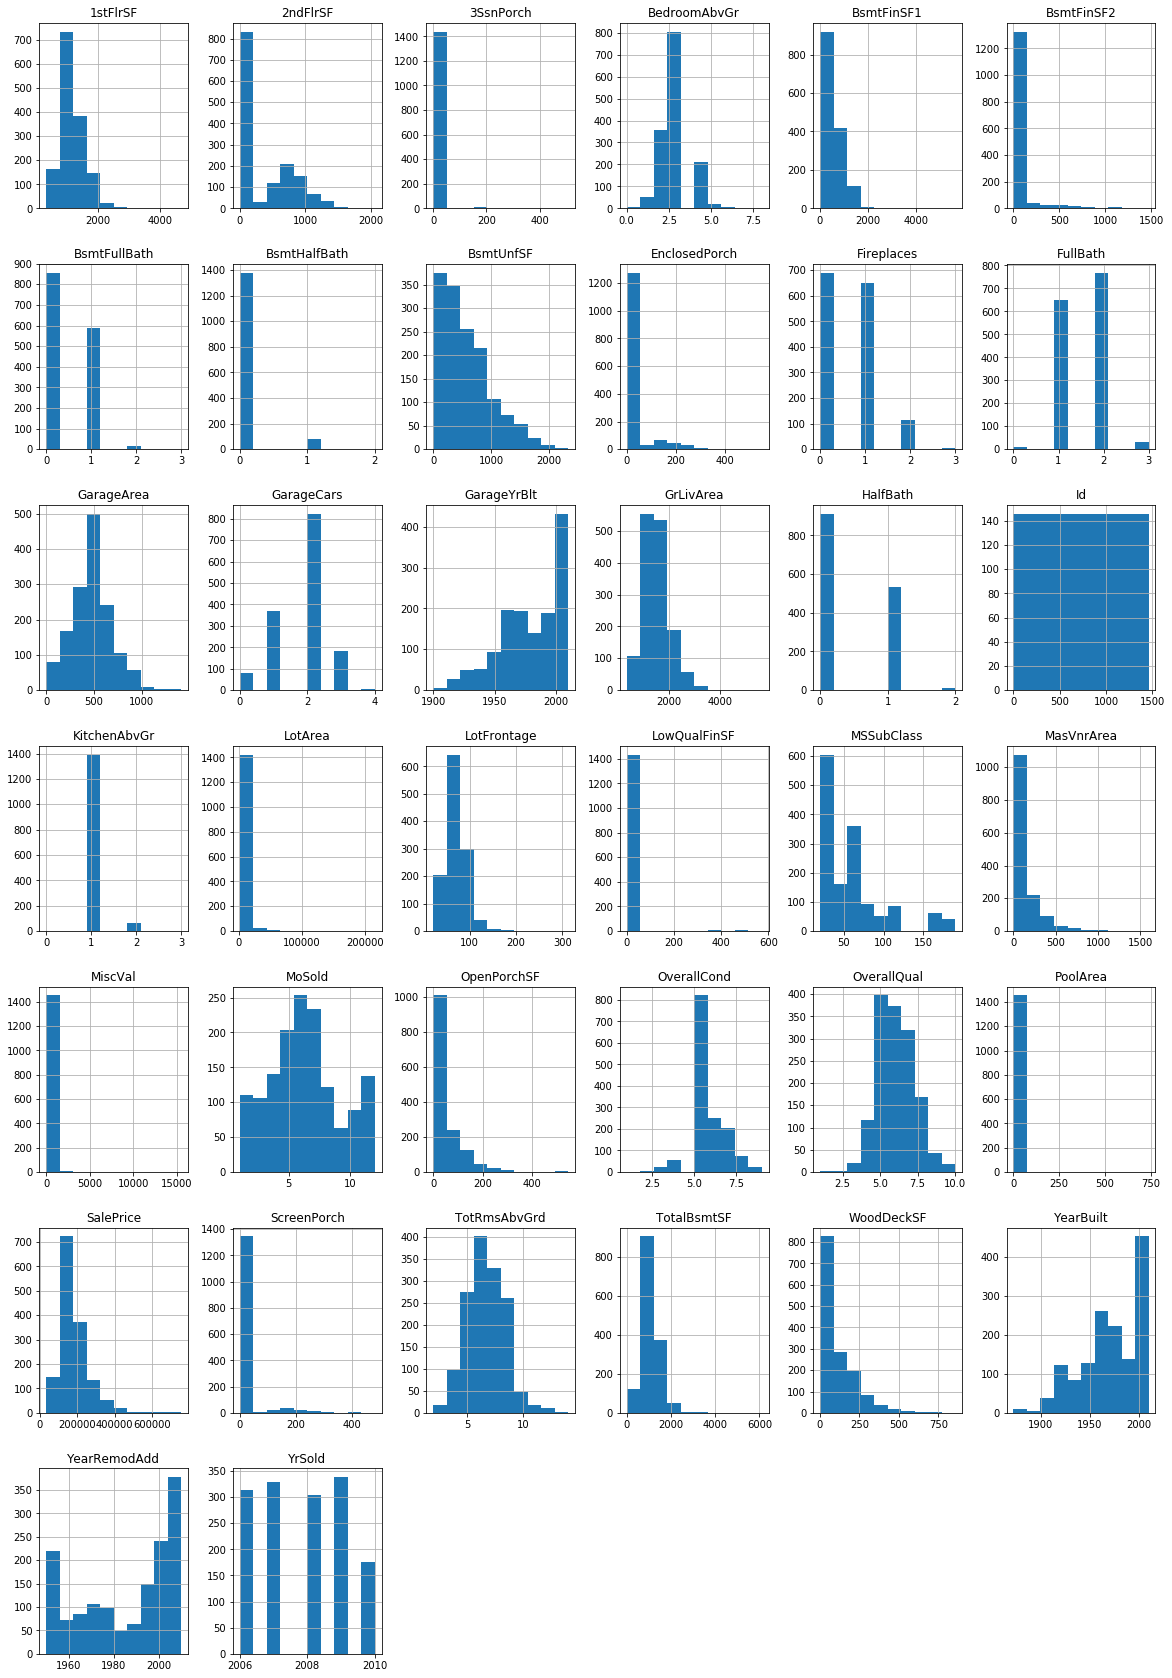

In [23]:
# histogramme
df_train_full.hist(figsize=(20,30))
pyplot.show()

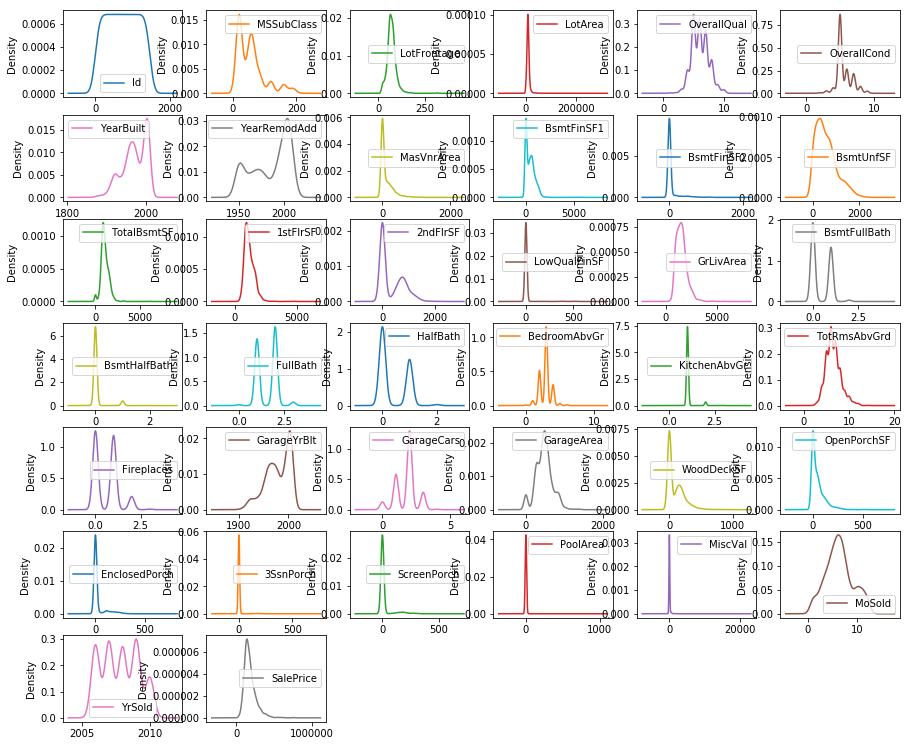

In [17]:
# density plot
df_train_full.plot(kind='density', subplots=True, layout=(8,6), sharex=False, figsize=(15,15)) 
pyplot.show()

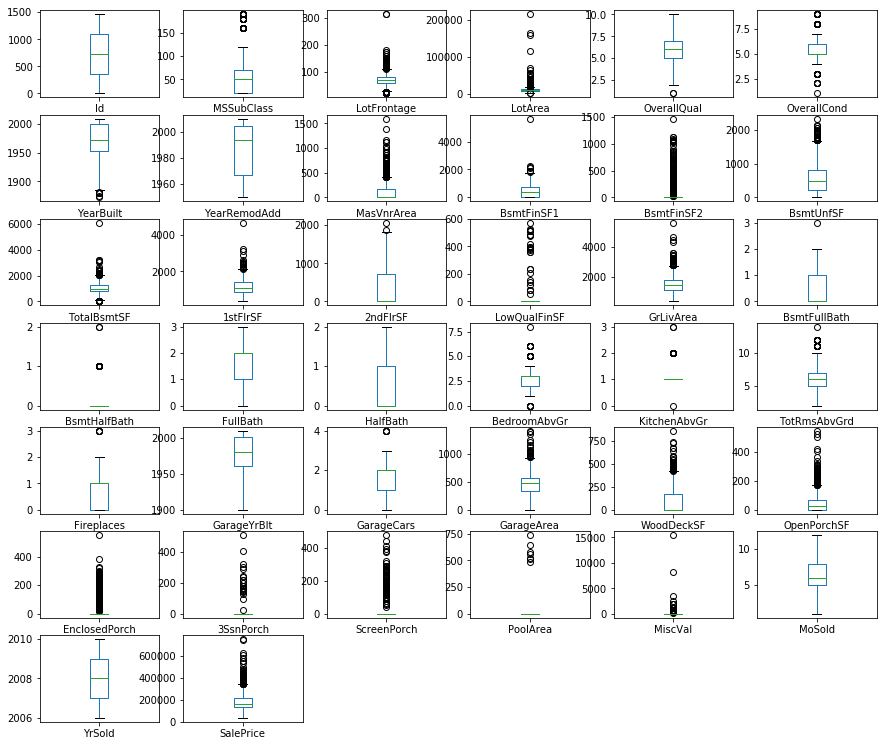

In [16]:
# boxplot
df_train_full.plot(kind='box', subplots=True, layout=(8,6), sharex=False, sharey=False, figsize=(15,15)) 
pyplot.show()

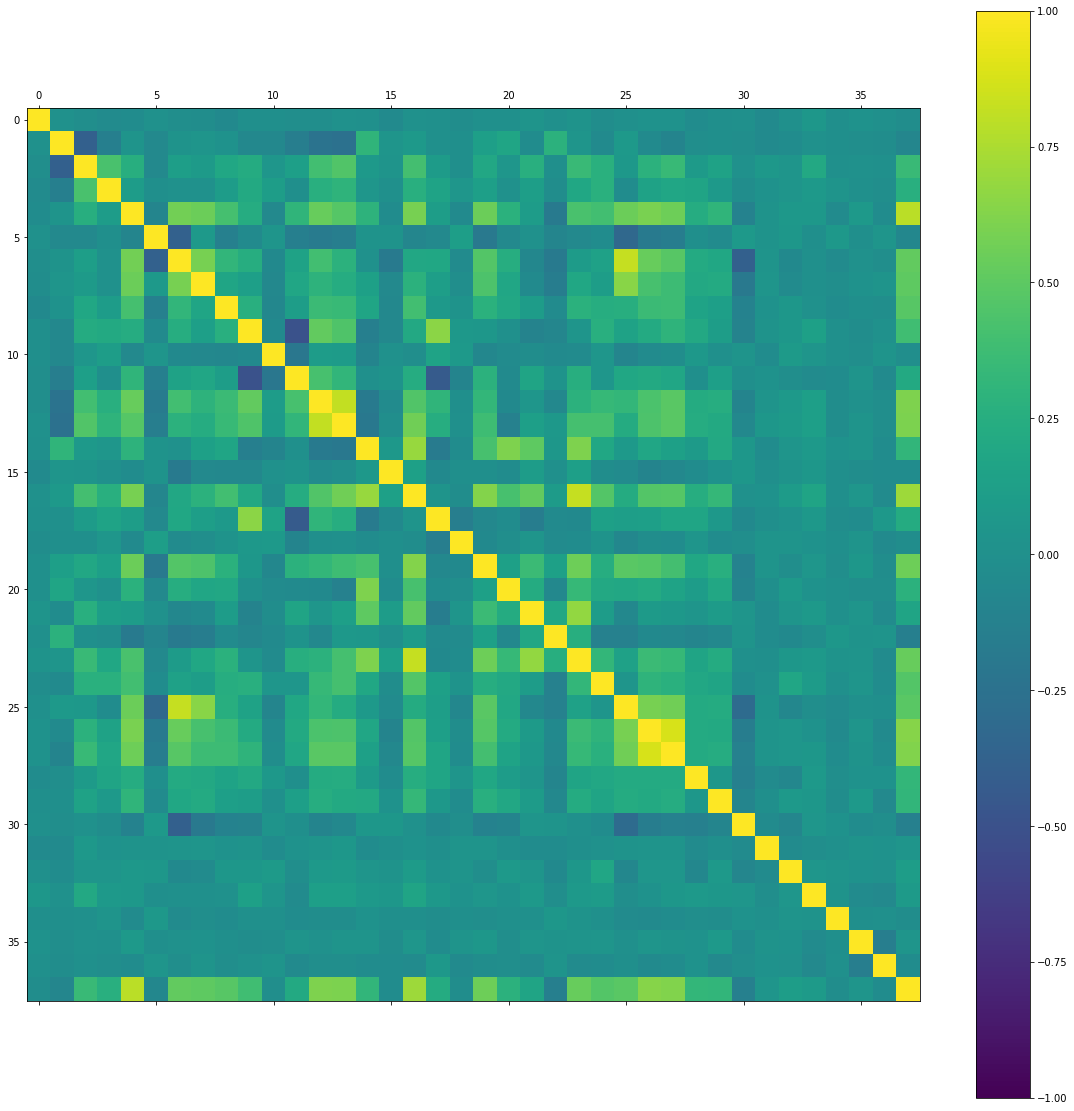

In [19]:
# correlation matrix
correlations = df_train_full.corr() 
fig = pyplot.figure(figsize=(20,20)) 
ax = fig.add_subplot(111) 
cax = ax.matshow(correlations, vmin=-1, vmax=1) 
fig.colorbar(cax) 
pyplot.show()

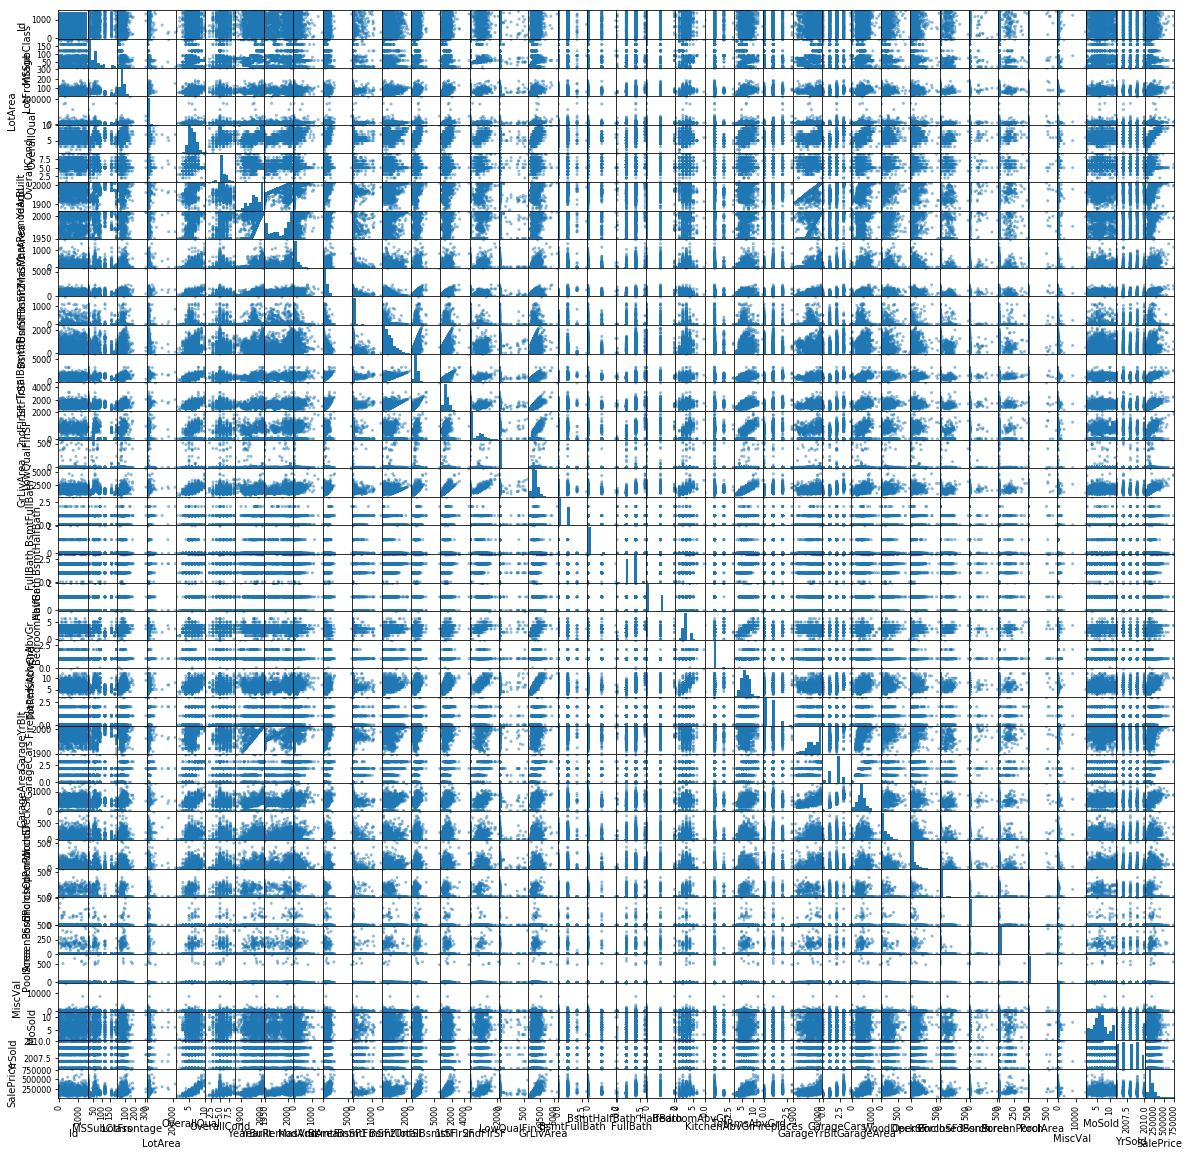

In [21]:
# nuage de point
scatter_matrix(df_train_full, figsize=(20,20)) 
pyplot.show()